In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.tsa.api as smt
import statsmodels.stats.api as sms
import statsmodels.api as sm
import scipy.stats as scs
import math

In [28]:
def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    """Helpful function to plot timeseries"""
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return 

In [29]:
def OSR2(predictions, train, test):
    sse = sum((test - predictions)**2)
    sst = sum((test - np.mean(train))**2)
    r2 = 1 - sse/sst
    
    return r2

In [30]:
df = pd.read_csv("data_VCLT.csv")   # change dataset name

In [31]:
df.head()

,Unnamed: 0,timestamp,open,high,low,close,volume,time,EMA,time.1,RSI,time.2,MFI
0,0,2019-04-15,91.28,91.3100,91.07,91.16,184345,2019-04-15,90.7630,2019-04-15,64.5848,2019-04-15,72.3825
1,1,2019-04-12,91.29,91.3600,91.12,91.17,347588,2019-04-12,90.7019,2019-04-12,64.7628,2019-04-12,77.3459
2,2,2019-04-11,91.32,91.4300,91.21,91.33,426818,2019-04-11,90.6298,2019-04-11,67.5280,2019-04-11,83.8987
3,3,2019-04-10,91.04,91.4100,91.04,91.39,372829,2019-04-10,90.5221,2019-04-10,68.5471,2019-04-10,83.3303
4,4,2019-04-09,90.93,90.9799,90.70,90.84,730706,2019-04-09,90.3886,2019-04-09,63.9111,2019-04-09,83.4828


In [32]:
# interested in 1-day close price
close = df.close
close.name = 'close'
close.head()

0    91.16
1    91.17
2    91.33
3    91.39
4    90.84
Name: close, dtype: float64

In [33]:
len(close)

2349

In [34]:
train = close.loc[:len(close) -  int(len(close)*0.15)  -1]
test = close.loc[len(close) -  int(len(close)*0.15) :]
print(train.tail())
print(test.head())

1992    79.4605
1993    79.1600
1994    79.5491
1995    79.3000
1996    79.6600
Name: close, dtype: float64
1997    79.760
1998    79.670
1999    79.434
2000    78.987
2001    78.680
Name: close, dtype: float64


Text(0,0.5,'1-day close price of train set')

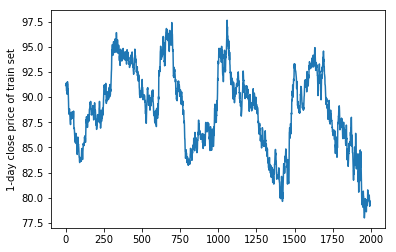

In [35]:
# is 1-day close price  stationary?
train.plot()
plt.ylabel('1-day close price of train set')

Text(0,0.5,'1-day close price of test set')

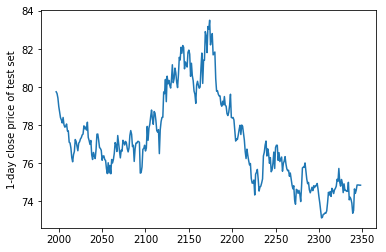

In [36]:
test.plot()
plt.ylabel('1-day close price of test set')

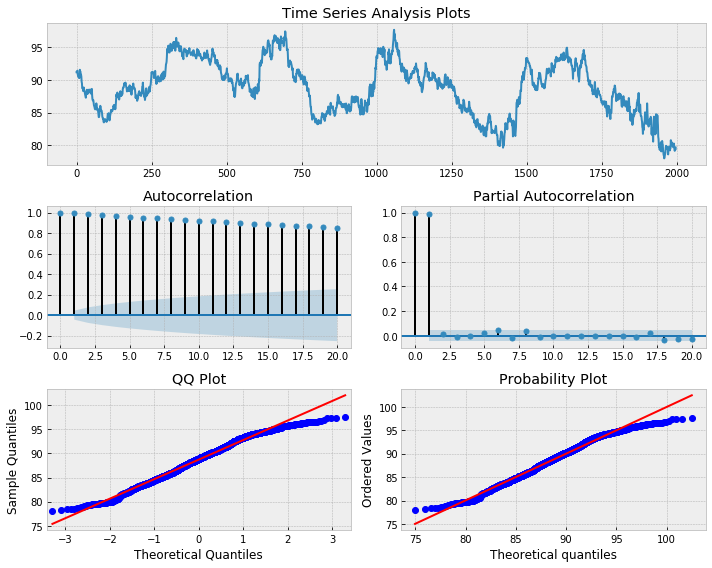

In [37]:
tsplot(train, lags=20)

In [38]:
# Augmented Dickey-Fuller unit root test
smt.adfuller(train, maxlag=20)
# first value is test statistic. Second value is the p-value
# p-value is not small enough to reject the null-hypothesis that the TS is non-stationary

(-2.282354234118287,
 0.17772225175186396,
 0,
 1996,
 {'1%': -3.433630425730241,
  '5%': -2.862989113874071,
  '10%': -2.5675414465504156},
 2806.845423097474)

Text(0,0.5,'Difference in 1-day close price')

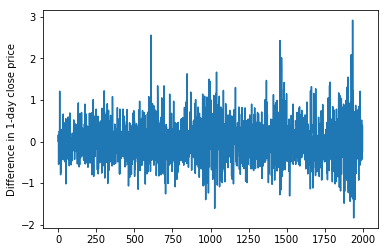

In [39]:
# are the difference between two 1-day close price stationary?
train_diff = train.diff().dropna()
train_diff.name = 'train close diff'
train_diff.plot()
plt.ylabel('Difference in 1-day close price')

In [40]:
# Augmented Dickey-Fuller unit root test
smt.adfuller(train_diff, maxlag=20)
# first value is test statistic. Second value is the p-value
# p-value is small enough to reject the null-hypothesis that the TS is non-stationary

(-18.26791413629885,
 2.3231446153765496e-30,
 6,
 1989,
 {'1%': -3.4336419856688276,
  '5%': -2.862994217611322,
  '10%': -2.567544164035933},
 2809.366914248473)

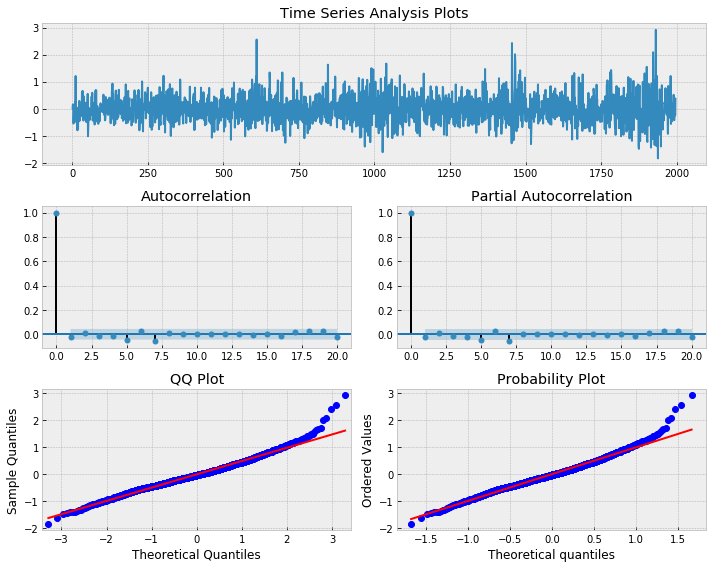

In [41]:
tsplot(train_diff, lags=20)

### Fit Model

In [42]:
arima010 = smt.ARIMA(train, (0,1,0)) #第一个AR， 第二个d，第三个MA  change parameters & model name
arima010_fit = arima010.fit() #change model name*2
arima010_fit.summary() #change model name

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                 1996
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1415.654
Method:                           css   S.D. of innovations              0.492
Date:                Wed, 17 Apr 2019   AIC                           2835.308
Time:                        14:19:38   BIC                           2846.506
Sample:                             1   HQIC                          2839.420
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0058      0.011     -0.523      0.601      -0.027       0.016
==============================================================================
"""

In [43]:
arima110 = smt.ARIMA(train, (1,1,0)) #第一个AR， 第二个d，第三个MA  change parameters & model name
arima110_fit = arima110.fit() #change model name*2
arima110_fit.summary() #change model name

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                 1996
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1415.115
Method:                       css-mle   S.D. of innovations              0.492
Date:                Wed, 17 Apr 2019   AIC                           2836.229
Time:                        14:19:39   BIC                           2853.026
Sample:                             1   HQIC                          2842.397
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0058      0.011     -0.536      0.592      -0.027       0.015
ar.L1.D.close    -0.0232      0.022     -1.039      0.299      -0.067       0.021
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -43.0209           +0.0000j           43.0209            0.5000
-----------------------------------------------------------------------------
"""

### Analyze residuals

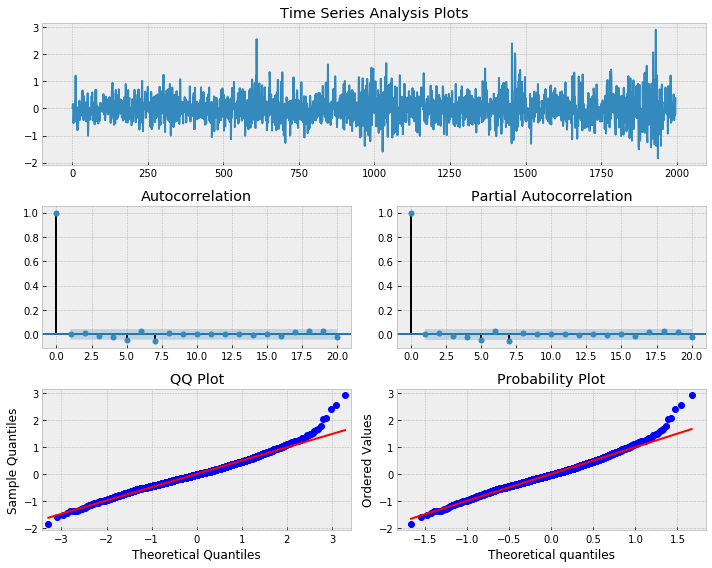

In [44]:
tsplot(arima110_fit.resid, lags=20) #change model name

### Test for remaining autocorrelation

In [45]:
# Ljung box test for remaining autocorrelation
sms.diagnostic.acorr_ljungbox(arima110_fit.resid, lags=(5,)) # or 10 lags       #change model name
#第二个是p-value  p值大于5%,序列为白噪声

(array([5.6612748]), array([0.34058533]))

### Forecasting

In [46]:
num_steps = 5
forecast_mean, forecast_std, forecast_ci = arima110_fit.forecast(steps=num_steps)   #change model name

In [47]:
arima110_fit.forecast(steps=num_steps)   #change model name

(array([79.64573208, 79.64016383, 79.63439336, 79.6286276 , 79.62286172]),
 array([0.49166221, 0.68728175, 0.83859162, 0.96649349, 1.07934404]),
 array([[78.68209185, 80.60937231],
        [78.29311635, 80.98721131],
        [77.990784  , 81.27800273],
        [77.73433517, 81.52292002],
        [77.50738627, 81.73833716]]))

In [48]:
arima110_fit.forecast(steps=num_steps)[0][4]    #change model name

79.62286171737053

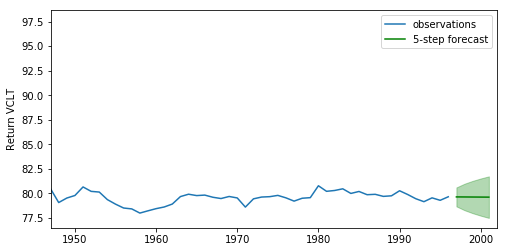

In [49]:
plt.figure(figsize=(8, 4))


plt.plot(train, label='observations')

forecast_steps = range(len(train), len(train) + num_steps)
plt.fill_between(forecast_steps, forecast_ci[:,0], forecast_ci[:,1], color='g', alpha=0.3)
plt.plot(forecast_steps, forecast_mean, label='5-step forecast', color='g')
plt.xlim([len(train) - 50, len(train) + num_steps])
plt.ylabel('Return VCLT')   #change stock name
plt.legend()

### Calculate the performance metrics on test set

In [50]:
pred = []
for i in range( int(len(close)*0.15) ): 
    moving_train = close.loc[:len(close) -  int(len(close)*0.15)  -5 + i]
    moving_arima110 = smt.ARIMA(moving_train, (1,1,0))   #change model parameters  & model name
    moving_arima110_fit = moving_arima110.fit()   #change model name*2
    
    pred.append(moving_arima110_fit.forecast(steps=5)[0][4]) #change model name

len(pred)

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

352

In [54]:
print( "OSR2 = " + str(OSR2(pred, train, test)))
print( "MAE = " + str(np.mean(abs(pred - test))))
print( "RMSE = " + str(math.sqrt(np.mean((pred - test)**2))))
print( "Scaled MAE = " + str(np.mean(abs(pred - test))/(max(test)-min(test))))
print( "Scaled RMSE = " + str(math.sqrt(np.mean((pred - test)**2))/(max(test)-min(test))))

OSR2 = 0.993608908488776
MAE = 0.7620459418592532
RMSE = 0.9418665013808077
Scaled MAE = 0.07334417149752197
Scaled RMSE = 0.09065125133597764
